In [26]:
# Importing numpy
import numpy as np

# Consider an example matrix
A = np.array(
    [
        [-1, -2, 0, 1, -2, -3],
        [-1, -2, -3, -2, 0, -3],
        [-1, -3, 1, 3, 2, -4],
        [2, 1, -1, 0, -2, 3],
        [0, -3, -1, 2, -1, -3],
        [1, -3, 2, 6, 0, -2],
        [-3, 1, 0, -4, 2, -2],
        [-2, 2, -2, -6, -2, 0],
        [-3, -1, 2, 0, 2, -4],
        [2, -2, 0, 4, -1, 0],
    ]
)

# Measure the shape of A: which is the maximum rank?
m, n = A.shape
print(f"The shape of A is: {(m, n)}.")

# Compute the SVD decomposition of A and check the shapes
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)

# Define the full matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

print(np.linalg.norm(U @ U.T - np.eye(m)))
print(np.linalg.norm(VT @ VT.T - np.eye(n)))

print(np.linalg.norm(A - U @ S @ VT))


The shape of A is: (10, 6).
(10, 10) (6,) (6, 6)
2.0110827977321407e-15
1.0730834692043003e-15
8.623259998041306e-15


In [27]:
print(s)
# values greater than 0 in the sigma m x n matrice gives the rank of the matrice A

# rank can also be computed direclty by 
print(np.linalg.matrix_rank(A))

# this is different because of machine epsilon because last 2 values in s are approaching zero. 
# Matrix Rank has tolerance param which is default at 10^-13
# these values in the s are lower than default tolerance so they aren't counted

[1.32720236e+01 1.03590904e+01 6.02367888e+00 2.87366090e+00
 6.04393909e-16 4.80298495e-16]
4


In [31]:
k = min(m,n)
print(k)

Uk = U[:,:k]
VTk = VT[:k,:]
Sk = S[:k,:k]

print(np.linalg.norm(A - Uk @ Sk @ VTk))

6
8.623259998041306e-15


Shape of the image: (512, 512).


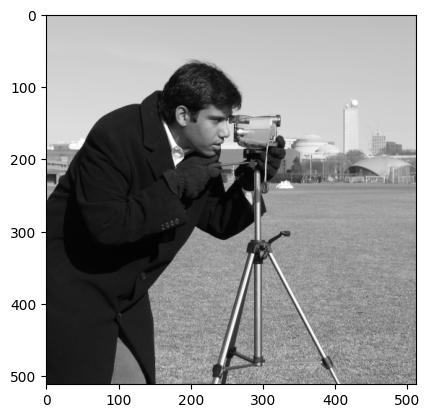

In [18]:
import skimage

# Loading the "cameraman" image
x = skimage.data.camera()
m, n = x.shape
# Printing its shape
print(f"Shape of the image: {x.shape}.")

# Visualize the image
import matplotlib.pyplot as plt

plt.imshow(x, cmap="gray")
plt.show()

(512, 512) (512,) (512, 512)


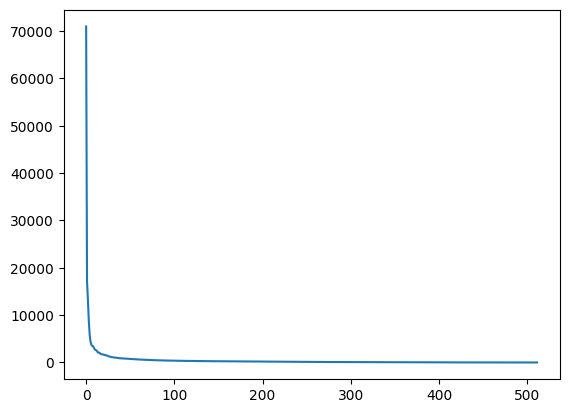

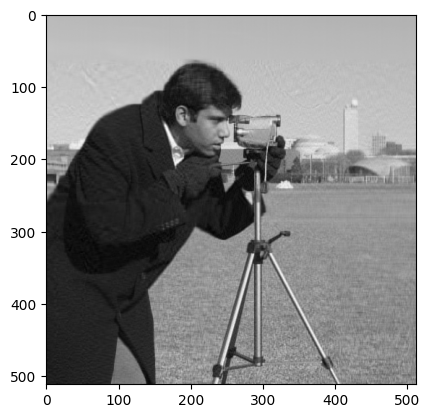

In [23]:
# Compute the SVD decomposition of A and check the shapes
U, s, VT = np.linalg.svd(x, full_matrices=True)
print(U.shape, s.shape, VT.shape)

plt.plot(s)
plt.show()

# Define the full matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

k = 80

Uk = U[:,:k] # m x k
Sk = S[:k, :k] # k x k
VTk = VT[:k,:] # k x n

# compute Xk
Xk = Uk @ Sk @ VTk

plt.imshow(Xk, cmap="gray")
plt.show()

In [24]:
compression_factor = 1 - (k*(m+n+1)/(m*n))
print(compression_factor)

0.68719482421875
